<img src="task4.PNG" width=1000 height=500>

### Importing libraries

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [18]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

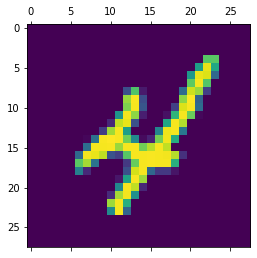

In [20]:
plt.matshow(X_train[9])

In [21]:
y_train[9]

4

### Scaling data

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Creating sequential model

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.0910 - accuracy: 0.9726
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0693 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0446 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.0379 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.0257 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.0223 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 2s 848us/step - loss: 0.0193 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 2s 939us/step

In [60]:
# Checking accuracy on test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 740us/step - loss: 0.0981 - accuracy: 0.9751


[0.09808307141065598, 0.9750999808311462]

### Prediction

In [61]:
y_hat = model.predict(X_test)
y_hat[0]

array([1.7873947e-10, 2.4202114e-12, 4.5399119e-07, 1.2960781e-07,
       3.5141062e-16, 2.8107719e-13, 9.8085919e-17, 9.9999940e-01,
       2.7600858e-08, 1.4036476e-08], dtype=float32)

In [62]:
y_pred = [np.argmax(i) for i in y_hat]
y_pred[0]

7

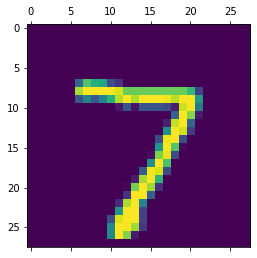

In [63]:
plt.matshow(X_test[0])

### Plotting confusion matrix

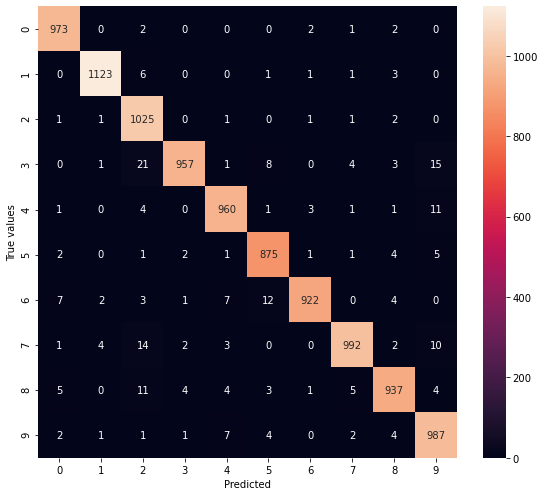

In [88]:
cm = tf.math.confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.tight_layout()